# <span style="color:#c9486f">**Metin Sınıflandırma**</span>

- **Yapısız Metin:** E-postalar, sosyal medya, web siteleri gibi yerlerde bulunan metinlerin çoğu yapısızdır. Bu, verilerin önceden tanımlanmış bir formatı olmadığı anlamına gelir ve bu da doğrudan anlamlı bilgiler çıkarmayı zorlaştırır.

- **Zorluklar:** Bu yapısız verilerden değerli bilgi çıkarmak zor ve zaman alıcıdır çünkü bu verilerin kullanışlı olabilmesi için belirli bir şekilde organize edilmesi gerekir.

- **Metin Sınıflandırıcılar:** Yapısız metin verilerini verimli bir şekilde organize etmeye ve yapılandırmaya yardımcı olan araçlardır. Bu araçlar süreci daha hızlı, maliyet etkin ve ölçeklenebilir hale getirir.

**Metin Sınıflandırma Nedir?**

- **Tanım:** Metin sınıflandırma, metin etiketleme veya kategorize etme olarak da bilinir ve metinleri önceden tanımlanmış kategorilere veya etiketlere atama sürecidir. Bu, büyük miktarda metin verisini organize etme ve analiz etme sürecinde yardımcı olur.

- **NLP Teknikleri:** Doğal Dil İşleme (NLP) teknikleri, metin sınıflandırıcıların metnin içeriğini analiz etmesine ve içeriğe dayalı olarak ilgili kategorileri otomatik olarak atamasına olanak tanır.

**Metin Sınıflandırma Örnekleri**

- **Duygu Analizi:** Bu sınıflandırma türü, bir metinde ifade edilen duygunun pozitif, negatif veya nötr olup olmadığını belirler. Örneğin, insanların belirli bir konu hakkında mutlu mu yoksa üzgün mü olduklarını anlamak için tweetleri analiz edebiliriz.

- **Konu Tespiti:** Bu görev, verilen bir metnin ana temasını veya konusunu tanımlamayı içerir. Örneğin, bir makalenin spor, teknoloji, siyaset gibi hangi konuda olduğunu tespit etmek.

- **Dil Tespiti:** Bu sınıflandırma, bir metnin hangi dilde yazıldığını tespit eder. Farklı dillerden gelen metin verilerini işlemek için çok önemlidir.

**Metin Sınıflandırma Sistemleri Kurma Süreci**
- **Veri Toplama:** Sınıflandırmak istediğiniz verileri toplayın. Bu, e-postalar, incelemeler, makaleler vb. olabilir.
- **Veri Bölme:** Toplanan verileri ikiye ayırın: biri modeli eğitmek için, diğeri ise testi için.
- **Metin Dönüştürme:** Ham metni, bir makine öğrenme modelinin anlayabileceği bir formata dönüştürün, genellikle sayısal vektörlere.
- **Model Eğitimi:** Sınıflandırıcınızı eğitim verilerini kullanarak eğitin, böylece metinleri doğru bir şekilde kategorize etmeyi öğrenebilir.
- **Model Değerlendirme:** Sınıflandırıcıyı test verileri üzerinde test ederek ne kadar iyi performans gösterdiğini görün.
- **Model Dağıtımı:** Performanstan memnun kaldığınızda, modeli yeni, görülmemiş metin verilerini sınıflandırmaya başlayabilmesi için dağıtın

In [30]:
import requests

url = "https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train"
response = requests.get(url)

with open("sentiment_train", "wb") as file:
    file.write(response.content)


In [31]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('sentiment_train',delimiter='\t')
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [32]:
pd.set_option('max_colwidth',800)
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [33]:
train_df[train_df['sentiment']==1].head()  # pozitif yorumlar

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [34]:
train_df[train_df['sentiment']==0].head()   # negatif yorumlar

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


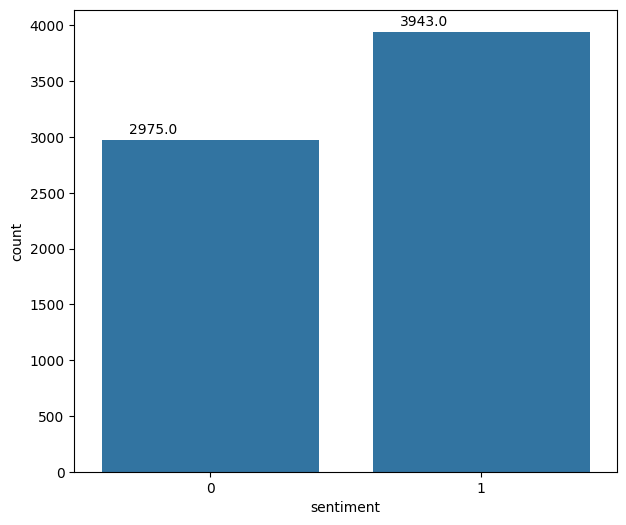

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))

ax = sns.countplot(x='sentiment',data=train_df) # countplot: kategorik değişkenlerin görselleştirilmesi için kullanılır. 0 ve 1 sayılarına bakıyoruz.
# Annotation
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

<span style="color:#2c82c8">


 # **Text preprocessing**
  </span>


<span style="color:#808000">

 ## **CountVectorizer Kullanımı**
  </span>


- **Amaç:** Metindeki her bir kelimenin kaç kez geçtiğini sayarak, metni kelime frekansları ile temsil etmek.

- **Neden:** Bu adım, metin verisini sayısal bir forma dönüştürmek için gerekli. CountVectorizer, her bir kelimeyi birer özellik (feature) olarak alır ve metindeki kelime sayısını vektörler halinde ifade eder. Bu vektörler, makine öğrenmesi algoritmalarının anlamlandırabileceği bir formata dönüştürülmüş olur.

<span style="color:#808000">

 ## **Özelliklerin Çıkarılması ve İncelenmesi**
  </span>


- **Amaç:** Metinde hangi kelimelerin bulunduğunu ve bu kelimelerin bir özellik (feature) olarak nasıl tanımlandığını görmek.

- **Neden:** Özellik vektörlerinin sayısını ve örnek kelimeleri incelemek, modelin ne üzerinde çalıştığını anlamamıza yardımcı olur. Bu adım, metin vektörleştirilirken hangi kelimelerin dikkate alındığını ve kelime dağarcığının (vocabulary) boyutunu görmemizi sağlar.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out() # ektörleştirici tarafından tanımlanan tüm özellikleri (kelimeleri) döndürür.
print(f"kelime dağarcığınızın toplam uzunluğu: {len(features)}, ilk 5 kelimenin örnekleri: {features[:5]}")

kelime dağarcığınızın toplam uzunluğu: 2132, ilk 5 kelimenin örnekleri: ['00' '007' '10' '10pm' '12']


<span style="color:#808000">

--------------------------------------------------
 ## **Metinlerin Vektörlere Dönüştürülmesi**
  </span>
  

- **Amaç:** Her bir metin belgesini (satır) kelime frekanslarıyla temsil eden bir vektör haline getirmek.

- **Neden:** Bu adım, her bir metin belgesinin sayısal bir vektör olarak ifade edilmesini sağlar. Bu vektörler, metindeki kelimelerin kaç kez geçtiğini gösterir ve makine öğrenmesi algoritmaları tarafından işlenebilir hale getirir.

In [37]:
train_df_features = cv.transform(train_df['text'])  
# eğitim veri setindeki metinleri kelime frekans matrisi haline dönüştürür. 
# Bu matris, kelimelerin hangi metinde kaç kez geçtiğini gösterir.


In [38]:
train_df_features  

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

<span style="color:#808000">

--------------------------------------------------
 ## **Sparse Matrix (Seyrek Matris) ve Yoğunluk Hesaplama**
  </span>

- **Amaç:** Vektörleştirilmiş verinin ne kadarını sıfırların oluşturduğunu ve veri setinin ne kadar "seyrek" olduğunu görmek.

- **Neden:** Seyrek matrisler, büyük veri setlerinde sıkça karşılaşılan bir durumdur. Çoğu kelime çoğu belgede geçmez, bu yüzden matrisin büyük kısmı sıfır olur. Seyrek matrisin yoğunluğu, veri setinin ne kadar bilgi taşıdığını anlamamıza yardımcı olur.

In [39]:
train_df_features.getnnz()   

# Seyrek matrisin içinde kaç tane sıfır olmayan öğe (kelime sayısı) bulunduğunu döndürür. 
# Bu örnekte, 65398 sıfır olmayan öğe bulunmaktadır.

65398

In [40]:
# Bu sayı, matrisin toplam boyutuna bölünerek ve 100 ile çarpılarak matrisin doluluk oranı hesaplanır (%0.4434).
65398/(6918*2132) * 100 

0.4434010415225908

<span style="color:#808000">

--------------------------------------------------
 ## **Seyrek Matrisin Yoğun Matrise Dönüştürülmesi**
  </span>

- **Amaç:** Matrisin içindeki tüm verileri (sıfırlar dahil) görmek.

- **Neden:** Yoğun matris, veri setinin tam yapısını gösterir. Bu matris, özelliklerin (kelimelerin) hangi belgelerde geçtiğini tam olarak gösterir.

In [41]:
train_df_features.todense()

# todense() metodu, seyrek matrisi yoğun bir matrise dönüştürür. 
# Bu, matrisin tüm öğelerini (sıfır ve sıfır olmayanlar dahil) içeren bir yapıdır.

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
train_df2 = pd.DataFrame(train_df_features.todense(), columns=features)
train_df2.head()
# Bu, eğitim veri setindeki metinlerin kelime frekans matrisini bir veri çerçevesine dönüştürür.
#  her sütun, features listesinde yer alan kelime özellikleri ile eşleşir.

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train_df2.iloc[0:2,150:158]
# ilk 2 satırını ve 150'den 158'e kadar olan sütunlarını seçer

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward,axes
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0


In [44]:
train_df.head(2)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


In [45]:
train_df2[['the', 'da','vinci','awesome','just','book']] [:2] 
# ilk 2 satırda hangi kelimelerin geçtiğini kontrol eder

,the,da,vinci,awesome,just,book
0,1,1,1,1,1,1
1,1,1,1,0,0,0


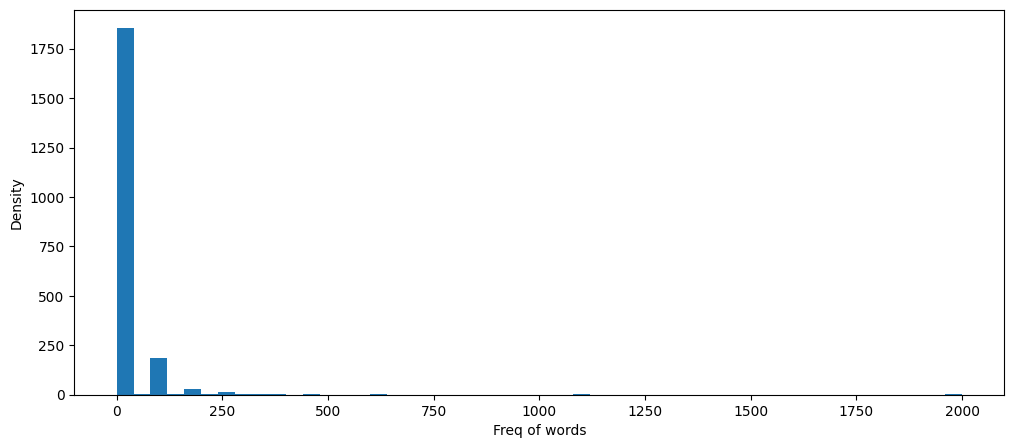

In [46]:
feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features, counts = feature_counts))

plt.figure(figsize=(12,5))
plt.hist(feature_count_df.counts, bins=50, range=(0,2000))
plt.xlabel('Freq of words')
plt.ylabel('Density')
plt.show()


<span style="color:#808000">

--------------------------------------------------
 ## **Tek Geçiş (Low Frequency) Kelimelerin Filtrelenmesi**
  </span>

- **Amaç:** Sadece bir kez geçen kelimeleri bulmak ve incelemek.

- **Neden:** Bir kez geçen kelimeler genellikle modelin öğrenmesi açısından fazla bilgi taşımazlar ve gürültü olarak kabul edilirler. Bu tür kelimeleri belirlemek, veri setini daha anlamlı hale getirmek için önemlidir.

In [47]:
# counts sütununda sadece bir kez geçen kelimeleri (counts==1) filtreler ve gösterir.
feature_count_df[feature_count_df['counts']==1]


,features,counts
0,00,1
1,007,1
3,10pm,1
4,12,1
5,16,1
...,...,...
2125,younger,1
2127,yuck,1
2128,yuh,1
2129,zach,1


In [68]:
cv = CountVectorizer(max_features=1000)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"kelime dağarcığınızın toplam uzunluğu: {len(features)}, ilk 5 kelimenin örnekleri: {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

kelime dağarcığınızın toplam uzunluğu: 1000, ilk 5 kelimenin örnekleri: ['10' '17' '33' '6th' 'aaron']


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


<span style="color:#2c82c8">

---------------------------------------------------------------------
 # **Stop Words Kaldırma**
  </span>

In [59]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words

In [65]:
my_stop_words = list(my_stop_words.union({'harry', 'potter', 'code', 'vinci', 'mountain', 'movie', 'movies', 'da'}))


In [66]:
# stop words'leri çıkardıktan sonra kalan kelimeleri sayısal vektörlere dönüştür
# Bu sayede, metin sadece anlamlı ve model için önemli kelimeleri içerecek şekilde temizlenir.

cv = CountVectorizer(max_features=1000, stop_words=my_stop_words)
feature_vector = cv.fit(train_df['text'])

In [69]:
# Özelliklerin Çıkarılması ve İncelenmesi
features = cv.get_feature_names_out()
print(f"kelime dağarcığınızın toplam uzunluğu: {len(features)}, ilk 5 kelimenin örnekleri: {features[:5]}")

# vektörlerin Dönüştürülmesi ve Özellik Frekanslarının Hesaplanması
train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)    # axis=0: sütun bazında toplama yapar.
feature_count_df = pd.DataFrame(dict(features=features,        
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10) # ascending=False: büyükten küçüğe sıralama yapar.

kelime dağarcığınızın toplam uzunluğu: 1000, ilk 5 kelimenin örnekleri: ['10' '17' '33' '6th' 'aaron']


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


<span style="color:#2c82c8">

---------------------------------------------------------------------
 ## **Stemming & Lemmatization**
  </span>

  PorterStemmer, nltk kütüphanesinin bir sınıfı olup, kelimeleri köklerine indirger (stemmer).

In [70]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

analyzer = CountVectorizer().build_analyzer() # metni analiz etmek için kullanılan bir fonksiyon oluştur

def stem_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop = [ word for word in list(set(stemmed_words) - set(my_stop_words))]  # stop words'leri çıkar
  return non_stop

In [71]:
cv = CountVectorizer(max_features=1000, analyzer=stem_words)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"kelime dağarcığınızın toplam uzunluğu: {len(features)}, ilk 5 kelimenin örnekleri: {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

kelime dağarcığınızın toplam uzunluğu: 1000, ilk 5 kelimenin örnekleri: ['10' '17' '33' '6th' 'abl']


,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1116
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823
